In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, ttest_ind, pearsonr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

# Plan
- As a junior data scientist, an email requesting the following is recieved?:
    1. Predict the values of single unit properties that a tax district assesses using property data from whos last transaction was during the "hot months" (in terms of real estate demand) of May and June 2017.
    
    2. A few problems exist:    
    __a:__ the current data which gave the location of each property has been lost. We need to know what county each property is located in. So we will have to find a way to acquire this data.
    
    3. The Zillow Data Science team would also like to know the distribution of tax rates for each county but specified this is not part of the __MVP__
        - since the data already has the tax amounts and tax value of the home it should be easy to create a new notebook with this information. 
        __We cannot use this information in our model__

# Deliverables
1. Create a report in the form of slides and present it verbally.
2. Create a github repository containing all my work, which should consist of the following:
    - at least 1 jupyter notebook that walks throuh the pipeline
    - ensure all questions are being answered 
    - add all the `.py` files so our work can be reproduced, knowing that for this to be reporduced by someone else they would have to have their own `env.py` so they can access the SQL  Zillow database

# We have cleaned and prepared the data

In [2]:
# cleaned and prepared the data
df = pd.read_csv('clean_zillow.csv') .set_index(['parcelid']) # reading cleaned data and we need to reset the index to parcelid

df.head()

,bathrooms,bedrooms,square_feet,fips_number,propertylandusetypeid,propertylandusedesc,home_value,tax_amount,county_name
parcelid,,,,,,,,,
11289917,2.0,3.0,1458.0,6037,261,Single Family Residential,136104.0,2319.90,Los Angeles
11705026,1.0,2.0,1421.0,6037,261,Single Family Residential,35606.0,543.69,Los Angeles
14269464,3.0,4.0,2541.0,6059,261,Single Family Residential,880456.0,9819.72,Orange
11389003,2.0,3.0,1650.0,6037,261,Single Family Residential,614000.0,7673.19,Los Angeles
11967869,1.0,2.0,693.0,6037,261,Single Family Residential,274237.0,3267.47,Los Angeles


In [3]:
# need to drop some columns 
df = df.drop(columns=['fips_number', 'propertylandusetypeid', 'propertylandusedesc',
                 'tax_amount', 'county_name'])

In [4]:
df.head()

,bathrooms,bedrooms,square_feet,home_value
parcelid,,,,
11289917,2.0,3.0,1458.0,136104.0
11705026,1.0,2.0,1421.0,35606.0
14269464,3.0,4.0,2541.0,880456.0
11389003,2.0,3.0,1650.0,614000.0
11967869,1.0,2.0,693.0,274237.0


# Split into train/test
  - separate attributes into new dataframe called X
  - separate y into its own dataframe
  - split X and y 

In [5]:
# # Define X and y variables
# X = df[['bathrooms', 'bedrooms', 'square_feet']]
# y = df[['home_value']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=123)

In [6]:
# X_train.head()

In [19]:
import sklearn.model_selection

# split into train and test
train, test = sklearn.model_selection.train_test_split(df, train_size=.8, random_state=123)

In [20]:
predictions = pd.DataFrame({'actual' : train.home_value })

In [21]:
predictions.head()

,actual
parcelid,
13851543,453460.0
12543841,245830.0
11064559,52341.0
13038910,118128.0
14056193,774974.0


In [22]:
# Model 1
X = train[['bathrooms']]
y = train.home_value

lm_1 = sklearn.linear_model.LinearRegression()
lm_1.fit(X, y)
predictions['bathrooms'] = lm_1.predict(X)

In [23]:
lm_1.coef_, lm_1.intercept_

(array([371637.761028]), -320348.49553889583)

In [24]:
predictions.head()

,actual,bathrooms
parcelid,,
13851543,453460.0,422927.026517
12543841,245830.0,422927.026517
11064559,52341.0,422927.026517
13038910,118128.0,422927.026517
14056193,774974.0,608745.907031


In [25]:
X = train[['bedrooms']]
y = train.home_value

lm_2 = sklearn.linear_model.LinearRegression()
lm_2.fit(X, y)
predictions['bedrooms'] = lm_2.predict(X)

In [26]:
lm_2.coef_, lm_2.intercept_

(array([212584.14741087]), -159256.6119310693)

In [27]:
predictions.head()

,actual,bathrooms,bedrooms
parcelid,,,
13851543,453460.0,422927.026517,478495.830302
12543841,245830.0,422927.026517,265911.682891
11064559,52341.0,422927.026517,478495.830302
13038910,118128.0,422927.026517,691079.977712
14056193,774974.0,608745.907031,691079.977712


In [28]:
X = train[['square_feet']]
y = train.home_value

lm_3 = sklearn.linear_model.LinearRegression()
lm_3.fit(X, y)
predictions['square_feeet'] = lm_3.predict(X)

In [29]:
lm_3.coef_, lm_3.intercept_

(array([441.26731949]), -314735.2992343814)

In [30]:
predictions.head()

,actual,bathrooms,bedrooms,square_feeet
parcelid,,,,
13851543,453460.0,422927.026517,478495.830302,243026.592605
12543841,245830.0,422927.026517,265911.682891,389527.342676
11064559,52341.0,422927.026517,478495.830302,302597.680736
13038910,118128.0,422927.026517,691079.977712,653405.199733
14056193,774974.0,608745.907031,691079.977712,805201.157638


In [18]:
# calcaulte mean squared error for every column in the df
predictions.apply(lambda col: sklearn.metrics.mean_squared_error(predictions.actual, col))

actual          0.000000e+00
bathrooms       3.949942e+11
bedrooms        4.918104e+11
square_feeet    3.467685e+11
dtype: float64

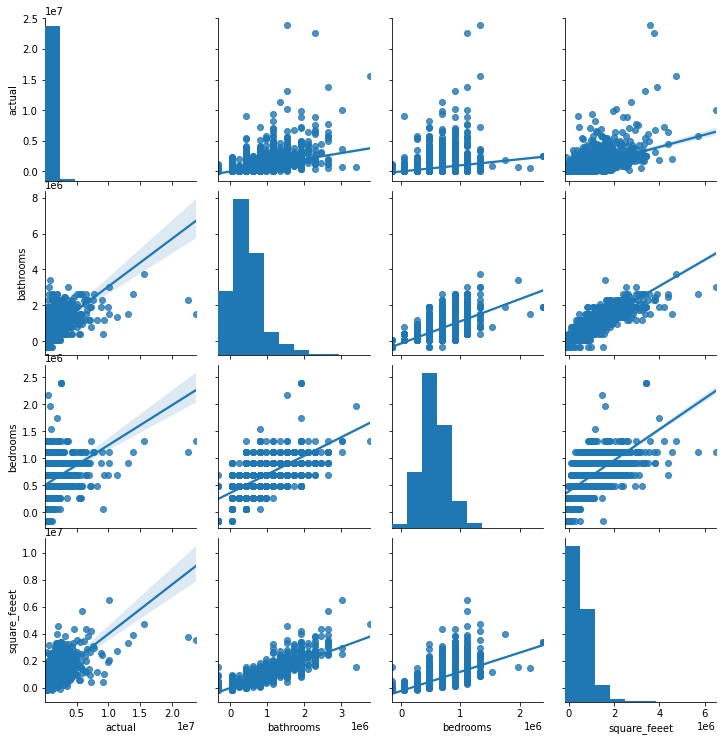

In [40]:
sns.pairplot(predictions, kind = 'reg')

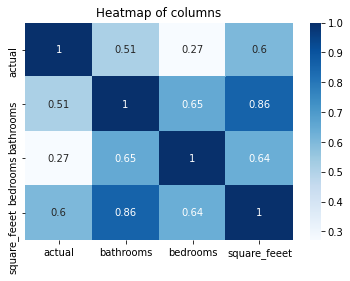

In [41]:
plt.title("Heatmap of columns")
sns.heatmap(predictions.corr(), cmap='Blues', annot=True)
plt.show()